In [1]:
import vamp
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from __future__ import print_function

In [2]:
audio_file = "data/2020/Iceland_Think About Things_Daði & Gagnamagnið.mp3"
audio = es.MonoLoader(filename=audio_file, downmix='mix', sampleRate=44100)()
sr = 44100

In [3]:
data = vamp.collect(audio, 44100, "mtg-melodia:melodia")

In [4]:
hop, melody = data['vector']
print(melody)

[-220. -220. -220. ... -880. -880. -880.]


In [5]:
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * (128/44100.0)

In [6]:
params = {"minfqr": 100.0, "maxfqr": 800.0, "voicing": 0.2, "minpeaksalience": 0.0}

data = vamp.collect(audio, sr, "mtg-melodia:melodia", parameters=params)
hop, melody = data['vector']

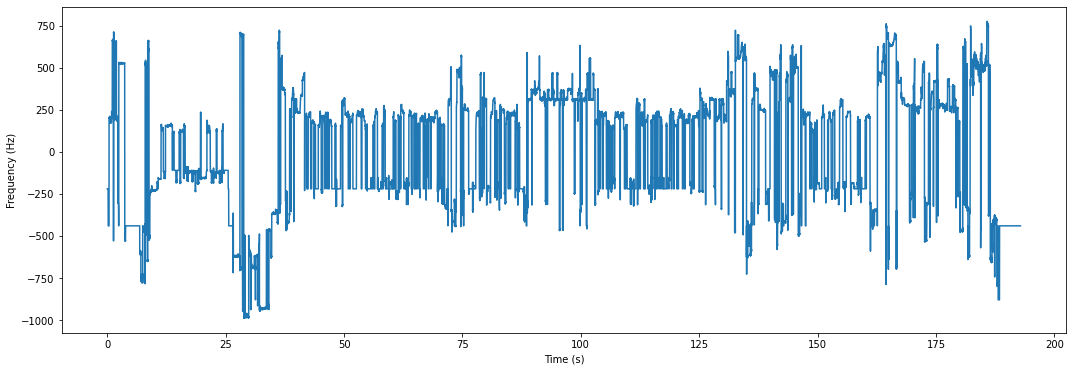

In [7]:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

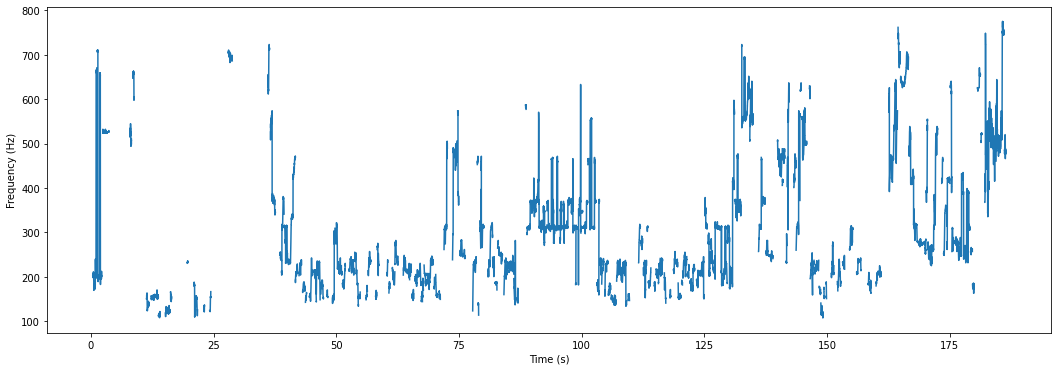

In [19]:
melody_pos = melody[:]
melody_pos[melody<0] = None
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_pos)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()